# Project Description – Image classification using CNNs in Keras
## Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's
species from a photo.

## Dataset:
The dataset can be download from Olympus.
The data file names are:
* images.npy
* Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

## Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

## Objective:
To implement the techniques learnt as a part of the course.
Learning Outcomes:
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
* Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the
attached problem statement should not be missed.
* Download the dataset from the Olympus platform.
* Upload the "images.npy" and “Labels.csv” file to google drive.
* Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.
* You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.

### Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Note:
* Download the train images from the Olympus Platform.
* Do not download the dataset from Kaggle, as:
* The dataset is big.
* The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way
to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For
our purpose we use this for our training and testing and validation purpose.
Happy Learning!

In [ ]:
import random
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential         
from tensorflow.keras.layers import Conv2D             
from tensorflow.keras.layers import MaxPooling2D        
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from glob import glob
from zipfile import ZipFile
from numpy import load


from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
path = '/Users/Lacey/Desktop/AIML course/Comp Vision Project/images.npy'

## Loading dataset, printing shape of data, visualizing images

In [3]:
data = load('images.npy')
num = len(data)
print(num)
labels = pd.read_csv('Labels.csv')

4750


The shape of the data:

In [4]:
data.shape

(4750, 128, 128, 3)

In [5]:
# creating an array for the plant labels
label_arr = np.array(labels)
label_id = (label_arr[0])

Viewing a couple of the original seedling pictures

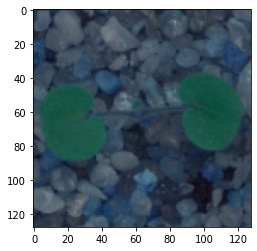

In [6]:
image = data[0]
image1 = data[1]
image2 = data[2]
plt.imshow(image)

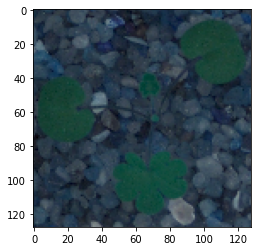

In [7]:
plt.imshow(image1)

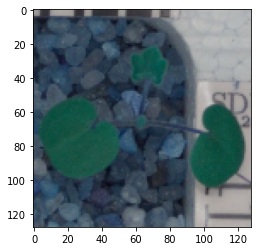

In [8]:
plt.imshow(image2)

## Gaussian Blurring

In [9]:
gauss = cv2.GaussianBlur(data, (5, 5), 0)

In [10]:
#label_arr2 = np.array(labels)
#image22 = gauss[0]
#label_id = (label_arr[0])

In [11]:
Gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(image1, (5, 5), 0)
Gaussian3 = cv2.GaussianBlur(image2, (5, 5), 0)

Viewing the seedling pictures from above with Gaussian Blurring:

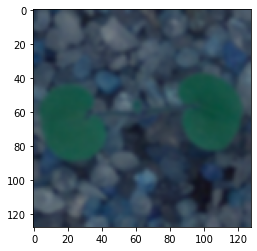

In [12]:
plt.imshow(Gaussian1)
plt.show()

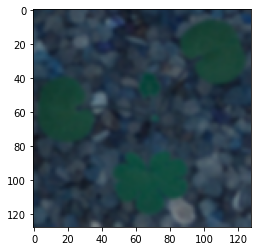

In [13]:
plt.imshow(Gaussian2)
plt.show()

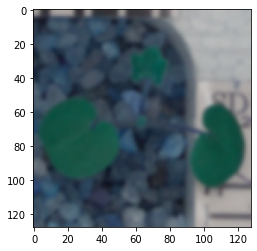

In [14]:
plt.imshow(Gaussian3)
plt.show()

## Normalization

In [15]:
# Normalization
X = np.array(data, dtype="float") / 255.0
#y = np.array(labels)

In [16]:
# Checking the shape of X
X.shape

(4750, 128, 128, 3)

Coverting labels to one-hot vectors

In [17]:
ytr = labels.iloc[:,0]
species = ytr.unique()
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(species)
enc_labels = lab_enc.transform(ytr)
y = to_categorical(enc_labels)

Splitting the data into testing and training sets, train size = 70%, test size = 30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Print the label for y_train[0]

In [19]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
# printing X_test and X_train shapes to verify correct separation
X_test.shape

(1425, 128, 128, 3)

In [21]:
X_train.shape

(3325, 128, 128, 3)

Taking X_test and splitting it in half to create a testing group and a validation group

In [22]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [23]:
# Double checking group shapes
X_test.shape

(712, 128, 128, 3)

In [24]:
X_val.shape

(713, 128, 128, 3)

In [25]:
batch_size = 20
num_classes = 12
epochs = 20
num_predictions = 20

The data did not need to be reshaped since I set up the model to take in the image size of the original data (128x128).

In [26]:
model = Sequential()
# Convolutional input layer, 32 filters of size 3x3, relu activation function, takes in input shape same size 
# as original images
model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(MaxPooling2D())

# Convolutional input layer, 64 filters of size 3x3, relu activation function
model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(MaxPooling2D())

# Convolutional input layer, 128 filters of size 3x3, relu activation function
model.add(Conv2D(filters = 128, kernel_size = 3, activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation ='relu'))
model.add(MaxPooling2D())

# Fully connected layer with 1024 units and relu activation function, softmax for classification
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [27]:
# Early stopping callback to the fit function 
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

In [28]:
# Model Checkpoint to save the weights whenever val_loss achieves a new low value. 
model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [29]:
y_train.shape

(3325, 12)

In [30]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [31]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Fitting the model

In [32]:
# Fitting the model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1)

Train on 3325 samples, validate on 713 samples
Epoch 1/20
3325/3325 [==============================] - 74s 22ms/sample - loss: 2.4207 - accuracy: 0.1498 - val_loss: 2.3849 - val_accuracy: 0.1599
Epoch 2/20
3325/3325 [==============================] - 73s 22ms/sample - loss: 1.9622 - accuracy: 0.2944 - val_loss: 1.7928 - val_accuracy: 0.3619
Epoch 3/20
3325/3325 [==============================] - 73s 22ms/sample - loss: 1.7534 - accuracy: 0.3588 - val_loss: 1.8577 - val_accuracy: 0.3296
Epoch 4/20
3325/3325 [==============================] - 73s 22ms/sample - loss: 1.6833 - accuracy: 0.3817 - val_loss: 1.6726 - val_accuracy: 0.4194
Epoch 5/20
3325/3325 [==============================] - 74s 22ms/sample - loss: 1.5586 - accuracy: 0.4424 - val_loss: 1.5628 - val_accuracy: 0.4334
Epoch 6/20
3325/3325 [==============================] - 76s 23ms/sample - loss: 1.3921 - accuracy: 0.4935 - val_loss: 1.3374 - val_accuracy: 0.5175
Epoch 7/20
3325/3325 [==============================] - 75s 23ms/

In [33]:
scores = model.evaluate(X_test, y_test, verbose=1)

712/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [34]:
#scores

Evaluate the model:

In [35]:
model.save('./classifier.h5')                 
model.save_weights('./classifier_weights.h5') 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.42305576667357025
Test accuracy: 0.83707863


In [36]:
Y_pred = model.predict(X_test)
#print(Y_pred)

In [37]:
Y_pred

array([[1.88156468e-04, 1.18529606e-07, 2.37713682e-10, ...,
        2.80765789e-07, 2.51879470e-07, 1.92731903e-07],
       [9.19968152e-05, 2.88002251e-04, 2.24299189e-02, ...,
        2.46471353e-03, 2.25518539e-04, 5.79377310e-03],
       [4.67900101e-08, 1.45828460e-06, 3.81576909e-10, ...,
        3.95447675e-09, 4.13676524e-11, 1.71768456e-03],
       ...,
       [1.50716151e-04, 1.32075467e-04, 1.42822901e-04, ...,
        5.86592518e-02, 2.20303162e-04, 1.51797233e-03],
       [6.13467046e-06, 9.04456750e-02, 1.92157209e-01, ...,
        4.67369944e-01, 1.47205815e-02, 1.07822847e-03],
       [3.64832609e-08, 3.47807348e-01, 6.50874436e-01, ...,
        1.01797068e-05, 1.05918059e-03, 6.18883041e-06]], dtype=float32)

In [38]:
#y_pred = np.argmax(Y_pred, axis=1)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_actual = np.argmax(y_test,axis = 1)
Y_pred_df = lab_enc.inverse_transform(Y_pred_classes)
Y_actual_df = lab_enc.inverse_transform(Y_actual)
results_data = pd.DataFrame(data={ 'species':Y_pred_df})
y_test2 = np.argmax(y_test,axis = 1)

In [39]:
print(classification_report(y_test2, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.45      0.57      0.50        37
           1       0.69      0.98      0.81        50
           2       0.78      0.75      0.76        51
           3       0.98      0.93      0.95        95
           4       0.85      0.94      0.89        35
           5       0.90      0.81      0.85        85
           6       0.84      0.71      0.77        96
           7       1.00      0.96      0.98        26
           8       0.81      0.83      0.82        77
           9       0.81      0.85      0.83        40
          10       0.97      1.00      0.98        60
          11       0.94      0.78      0.85        60

    accuracy                           0.84       712
   macro avg       0.83      0.84      0.83       712
weighted avg       0.85      0.84      0.84       712



In [40]:
#Y_pred = Y_pred[:, 0]

In [41]:
accuracy = accuracy_score(y_test2, Y_pred_classes)

In [42]:
accuracy

0.8370786516853933

In [43]:
precision = precision_score(y_test2, Y_pred_classes, pos_label='positive', average='micro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [44]:
precision

0.8370786516853933

In [45]:
recall = recall_score(y_test2, Y_pred_classes, pos_label='positive', average='micro')

In [46]:
recall

0.8370786516853933

In [47]:
f1 = f1_score(y_test2, Y_pred_classes, pos_label='positive', average='micro')

In [48]:
f1

0.8370786516853933

In [49]:
kappa = cohen_kappa_score(y_test2, Y_pred_classes)

In [50]:
kappa

0.820368996948587

In [51]:
#auc = roc_auc_score(y_test2, Y_pred_classes)

Confusion Matrix:

In [52]:
cf = confusion_matrix(Y_actual, Y_pred_classes)
cf

array([[21,  0,  0,  0,  2,  2, 12,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9, 38,  1,  0,  1,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 88,  0,  0,  0,  0,  4,  2,  1,  0],
       [ 0,  0,  1,  0, 33,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  4,  4,  0,  3, 69,  0,  0,  2,  1,  0,  2],
       [26,  0,  0,  1,  0,  0, 68,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  1],
       [ 0,  5,  2,  0,  1,  0,  0,  0, 64,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  5, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  4,  3,  0,  0,  4,  0,  0,  1,  0,  1, 47]], dtype=int64)

In [53]:
test_arr = np.array(results_data)

Predictions for various seedlings:

In [54]:
print('Plant number x_test[2] is:', test_arr[2])
print('Plant number x_test[3] is:', test_arr[3])
print('Plant number x_test[33] is:', test_arr[33])
print('Plant number x_test[36] is:', test_arr[36])
print('Plant number x_test[59] is:', test_arr[59])

Plant number x_test[2] is: ['Maize']
Plant number x_test[3] is: ['Small-flowered Cranesbill']
Plant number x_test[33] is: ['Scentless Mayweed']
Plant number x_test[36] is: ['Fat Hen']
Plant number x_test[59] is: ['Charlock']
